# BANKING CUSTOMER SEGMENTATION

In [1]:
#to import required packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # seaborn plots
import matplotlib.pyplot as plt   # matplot library
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#load the dataset 
customer_df=pd.read_csv('CC GENERAL.csv')

In [3]:
customer_SAM=pd.read_csv('CC GENERAL.csv')

In [4]:
# to see what is inside the dataframe
customer_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## BASIC EXPLORATORY DATA ANALYSIS


In [5]:
# to know the shape of dataframe
customer_df.shape

(8950, 18)

In [6]:
#to know about the dataset information
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
#NO of columns
customer_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
customer_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
# to get the total number of samples
print('customer data length: {}'.format(len(customer_df)))

customer data length: 8950


### UNIQUE VALUES IN THE DATASET

In [10]:
#to get unique values in the data

for i in customer_df.columns:
    print(i,':',len(customer_df[i].unique()))

CUST_ID : 8950
BALANCE : 8871
BALANCE_FREQUENCY : 43
PURCHASES : 6203
ONEOFF_PURCHASES : 4014
INSTALLMENTS_PURCHASES : 4452
CASH_ADVANCE : 4323
PURCHASES_FREQUENCY : 47
ONEOFF_PURCHASES_FREQUENCY : 47
PURCHASES_INSTALLMENTS_FREQUENCY : 47
CASH_ADVANCE_FREQUENCY : 54
CASH_ADVANCE_TRX : 65
PURCHASES_TRX : 173
CREDIT_LIMIT : 206
PAYMENTS : 8711
MINIMUM_PAYMENTS : 8637
PRC_FULL_PAYMENT : 47
TENURE : 7


### TOTAL NUMBER OF MISSING VALUES

In [11]:
customer_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
customer_df.loc[(customer_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = customer_df['MINIMUM_PAYMENTS'].mean()

In [13]:
# to check whether any missing value there
customer_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
# Fill out missing elements in the 'CREDIT_LIMIT' column
# Double check and make sure that no missing elements are present
customer_df.loc[(customer_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = customer_df['CREDIT_LIMIT'].mean()

In [42]:
# to check whether any missing value there
customer_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
# Let's see if we have duplicated enteries in the data
customer_df.duplicated().sum()

0

In [17]:
# Drop Customer ID column 'CUST_ID' and make sure that the column has been removed from the dataframe
customer_df.drop('CUST_ID', axis = 1, inplace = True)

In [18]:
customer_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [19]:
#No of columns 
n = len(customer_df.columns)
n

17

In [20]:
customer_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\Lokaratchagan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lokaratchagan\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Lokaratchagan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

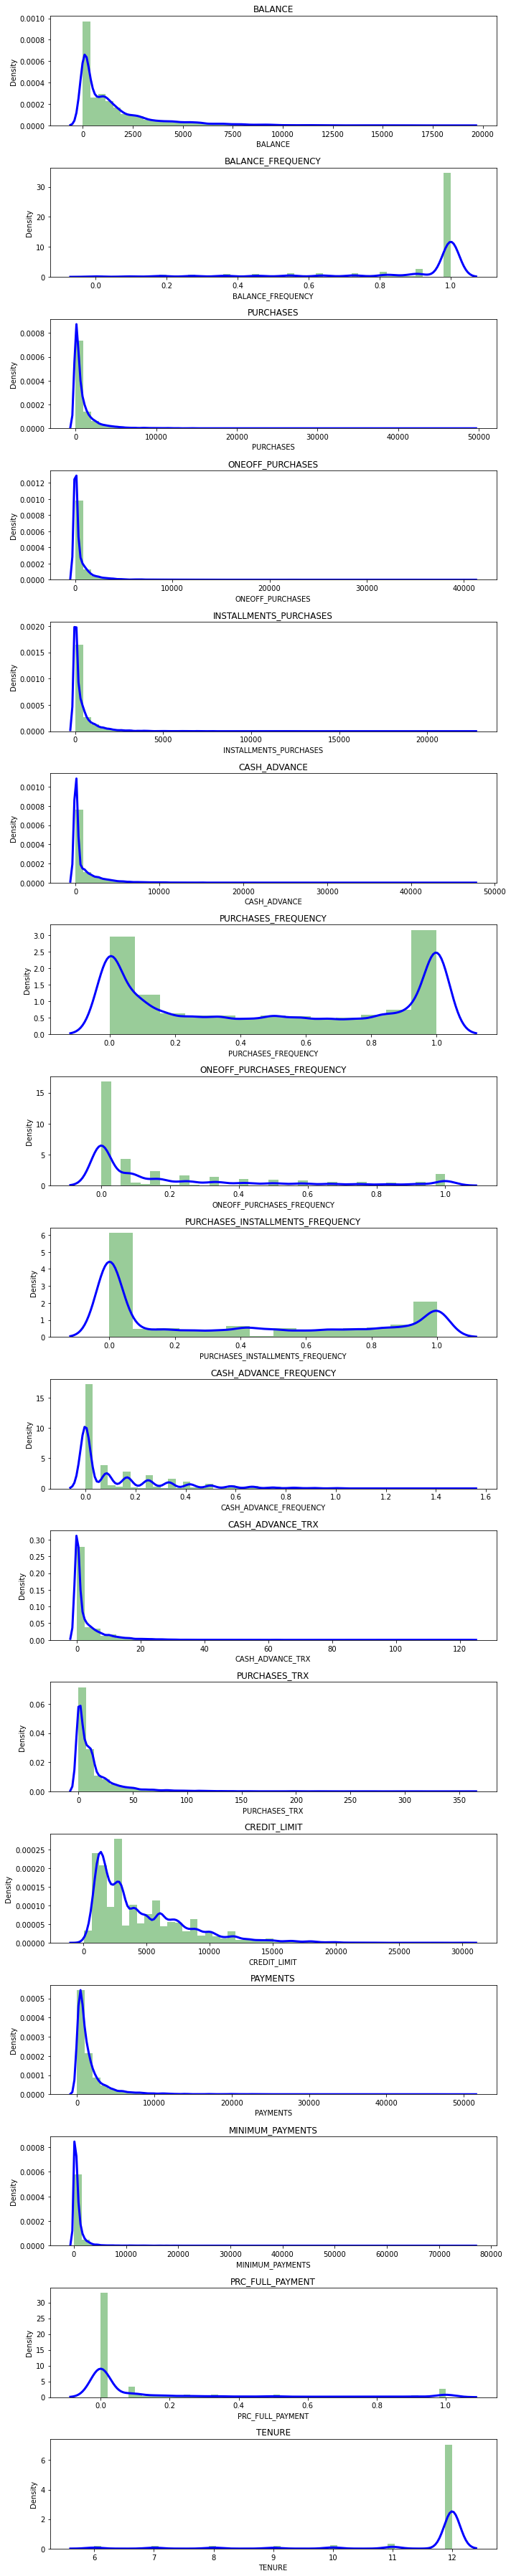

In [21]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate.
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize = (10, 50))
for i in range(len(customer_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(customer_df[customer_df.columns[i]], kde_kws = {"color":"b", "lw":3, "label":"KDE", "bw":0.1},hist_kws = {'color':'g', 'label':'Hist'}) # lw = line width
    plt.title(customer_df.columns[i])
plt.tight_layout()

<AxesSubplot:>

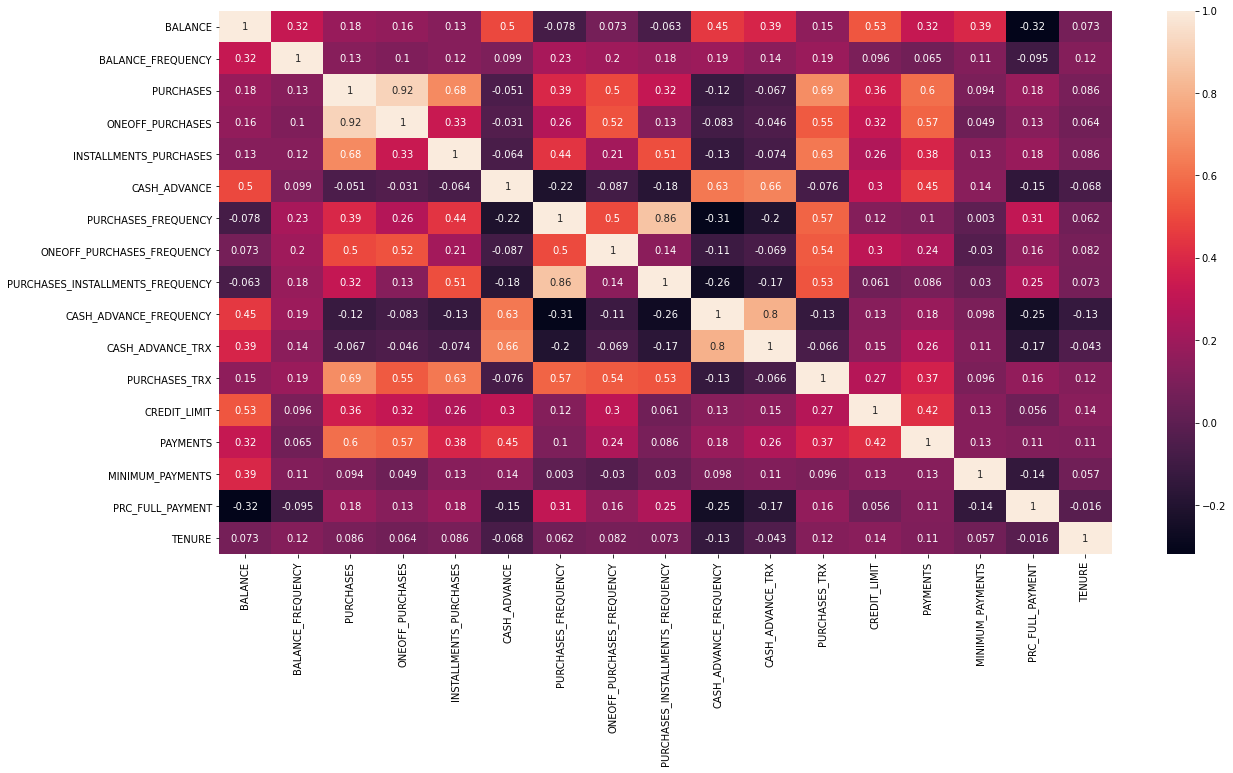

In [22]:
# Obtain the correlation matrix between features
correlations = customer_df.corr()
f, ax = plt.subplots(figsize = (20, 10)) # fix the size
sns.heatmap(correlations, annot = True)

In [23]:
# Let's scale the data first
scaler = StandardScaler()
customer_df_scaled = scaler.fit_transform(customer_df)

In [24]:
customer_df_scaled.shape

(8950, 17)

In [25]:
customer_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

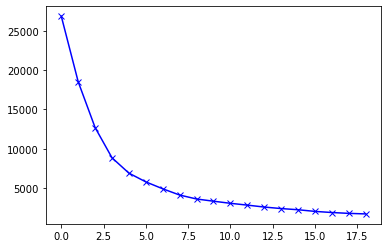

In [26]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')

scores_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(customer_df_scaled[:, :3]) # Run with first 7 features only
    scores_1.append(kmeans.inertia_) # inertia will give you the value of WCSS
    
plt.plot(scores_1, 'bx-')



#From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
 However, the values does not reduce linearly until 8th cluster. 
 Let's choose the number of clusters to be 7 or 8

# APPLY K-MEANS METHOD

In [47]:
kmeans = KMeans(7)
kmeans.fit(customer_df_scaled)
labels = kmeans.labels_ # labels (cluster) associated to each data point

In [48]:
kmeans.cluster_centers_.shape

(7, 17)

In [49]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [customer_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
1,0.013831,0.403660,-0.347294,-0.227664,-0.402798,-0.101040,-0.835637,-0.365737,-0.761558,0.089948,-0.038781,-0.472824,-0.300748,-0.247516,-0.004386,-0.455096,0.272516
2,-0.338120,0.355241,0.033768,-0.087469,0.240364,-0.369343,0.980028,0.203505,0.897065,-0.471800,-0.360266,0.233842,-0.144365,-0.178839,-0.084027,0.332637,0.271643
3,0.528421,0.454446,1.803344,1.548745,1.418596,-0.238987,1.153070,1.793622,0.969618,-0.351514,-0.262682,2.109896,1.121501,0.974786,0.199510,0.468539,0.310019
4,1.658772,0.397605,-0.213821,-0.152389,-0.225687,1.970238,-0.455353,-0.179237,-0.411478,1.901425,1.904043,-0.256713,1.002597,0.790062,0.558282,-0.397107,0.076016
5,-0.701412,-2.136668,-0.305991,-0.230585,-0.299775,-0.321670,-0.538002,-0.437645,-0.427111,-0.522659,-0.377400,-0.414570,-0.173854,-0.190361,-0.257158,0.291447,0.201493
6,-0.341141,-0.333100,-0.280989,-0.207459,-0.282905,0.060232,-0.171997,-0.271368,-0.207953,0.291927,-0.007982,-0.379541,-0.560480,-0.389957,-0.207857,0.021533,-3.178761


In [50]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [customer_df.columns])
cluster_centers



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
1,1593.263182,0.972894,261.205360,214.561414,46.821960,766.986342,0.154969,0.093351,0.061775,0.153144,2.984173,2.957194,3400.203837,1016.608051,853.986299,0.020607,11.882014
2,860.705799,0.961424,1075.351496,447.257283,628.425794,204.341543,0.883683,0.263167,0.720954,0.040732,0.790275,20.522272,3969.189857,1215.421382,668.385558,0.251005,11.880846
3,2664.338914,0.984925,4856.076483,3163.037514,1693.886427,477.704337,0.953133,0.737530,0.749788,0.064803,1.456215,67.153955,8574.929379,4555.054567,1329.155703,0.290754,11.932203
4,5017.067775,0.971460,546.372004,339.503001,206.981595,5110.551853,0.307595,0.148988,0.200905,0.515639,16.242525,8.328904,8142.308467,4020.296122,2165.259101,0.037568,11.619048
5,104.544305,0.371114,349.450560,209.714010,139.984503,304.314337,0.274424,0.071900,0.194692,0.030555,0.673350,4.405180,3861.895944,1182.066916,264.910484,0.238958,11.786967
6,854.418008,0.798362,402.868166,248.098605,155.239781,1105.181375,0.421320,0.121503,0.281791,0.193562,3.194357,5.275862,2455.195062,604.255929,379.804248,0.160013,7.263323


#Zeroth Customers cluster (Transactors): Those are customers who pay least amount of intrest charges and careful with their money, Cluster with lowest balance ($104) and cashadvance ($303), Percentage of full payment = 23%

#Sixth customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)

#Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits

#Second customer cluster (low tenure): these are customers with low tenure (7 years), low balance

In [31]:
labels.shape # labels associated to each data point

(8950,)

In [32]:
print(labels.max())
print(labels.min())

6
0


In [33]:
y_kmeans = kmeans.fit_predict(customer_df_scaled)
y_kmeans

array([0, 3, 2, ..., 1, 0, 4])

In [34]:
# concatenate the clusters labels to our original dataframe
customer_df_cluster = pd.concat([customer_df, pd.DataFrame({'cluster': labels})], axis = 1)
customer_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


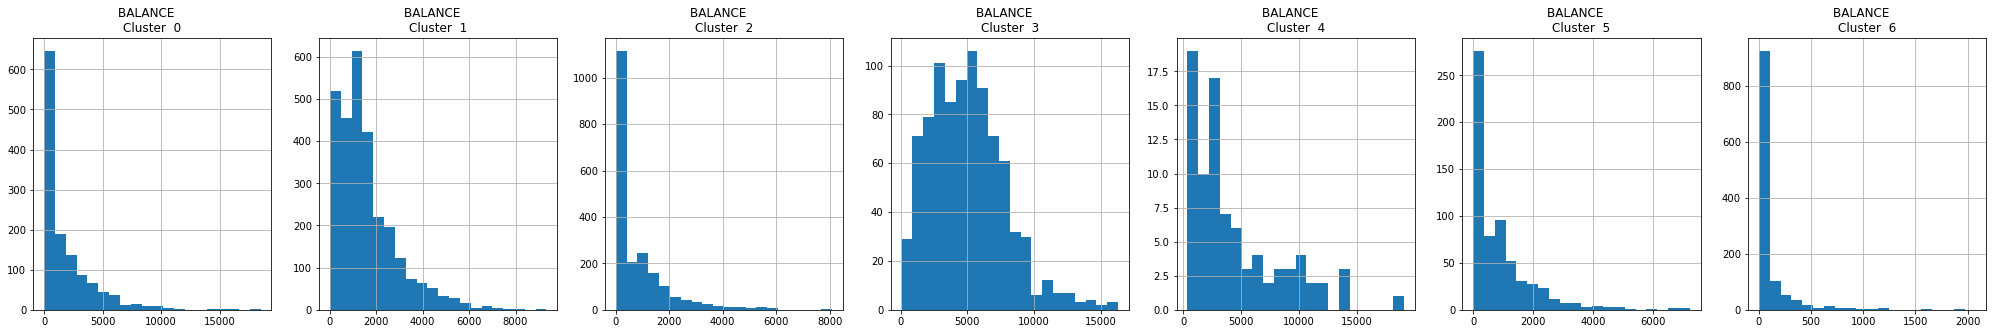

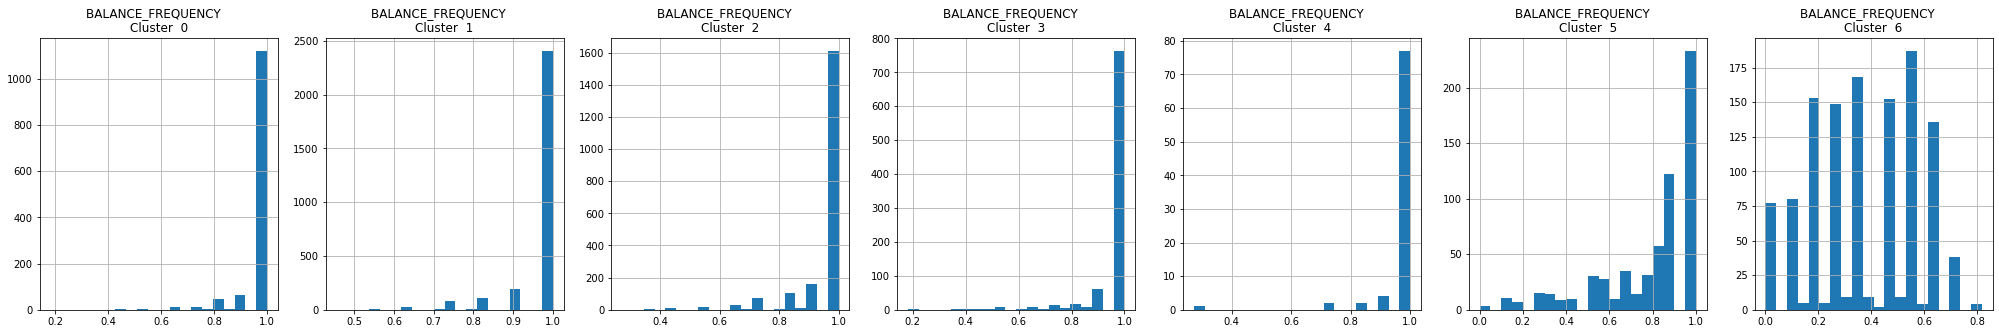

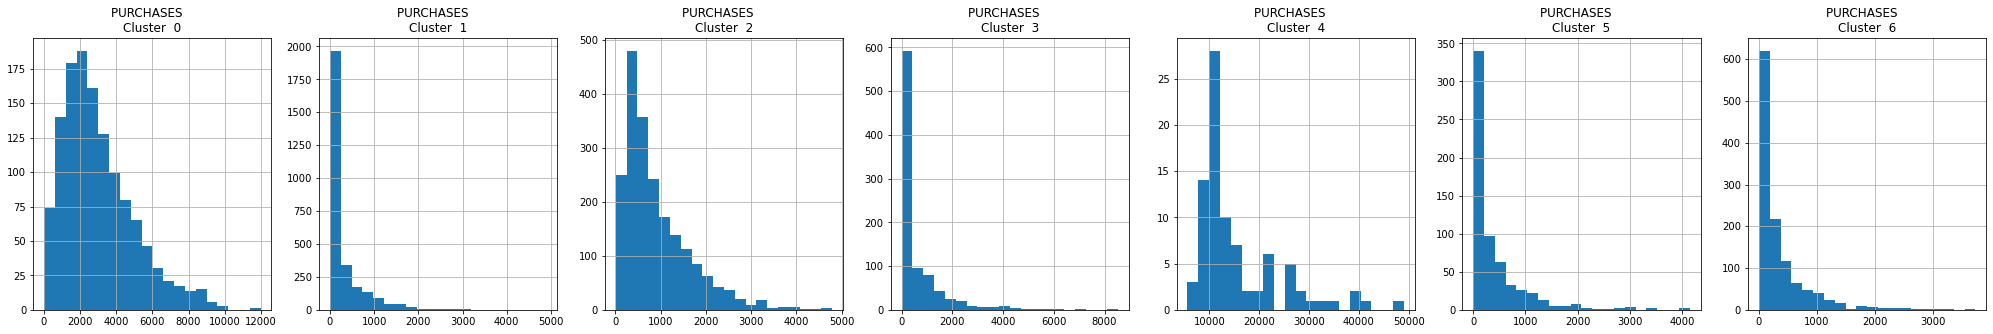

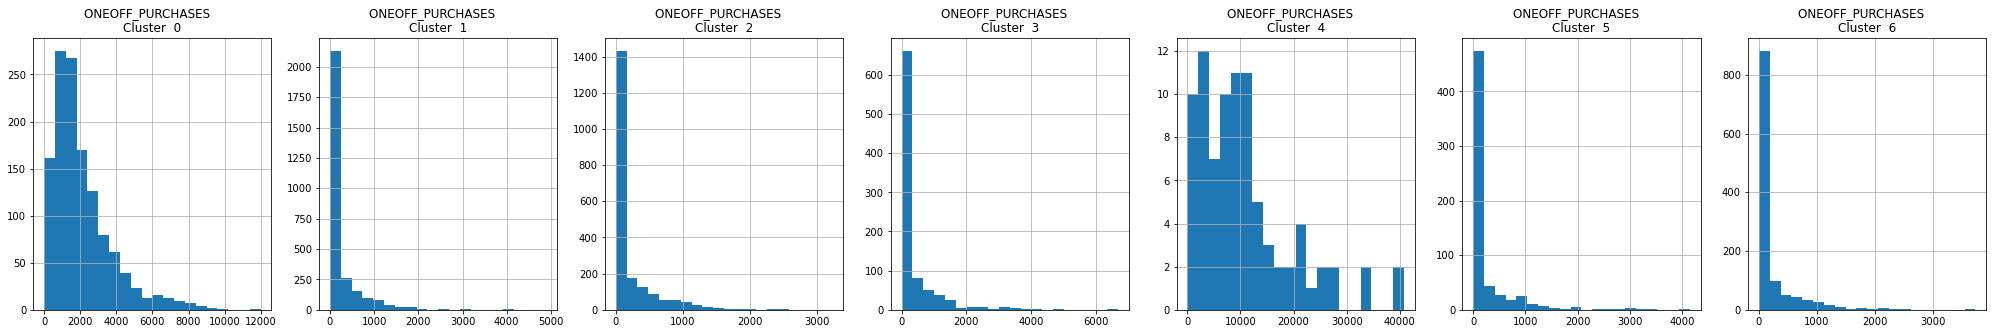

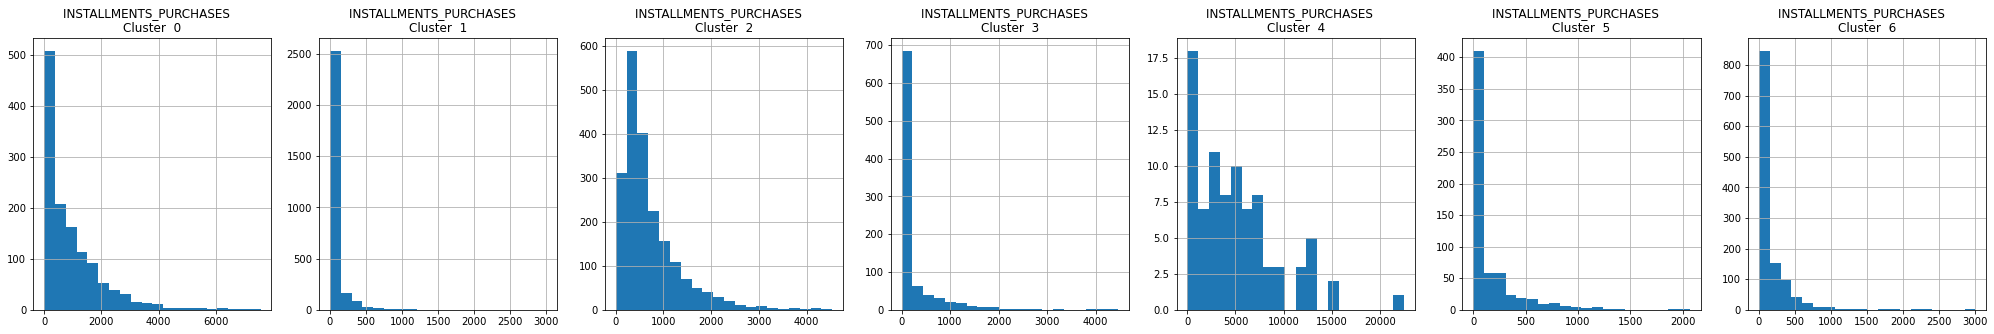

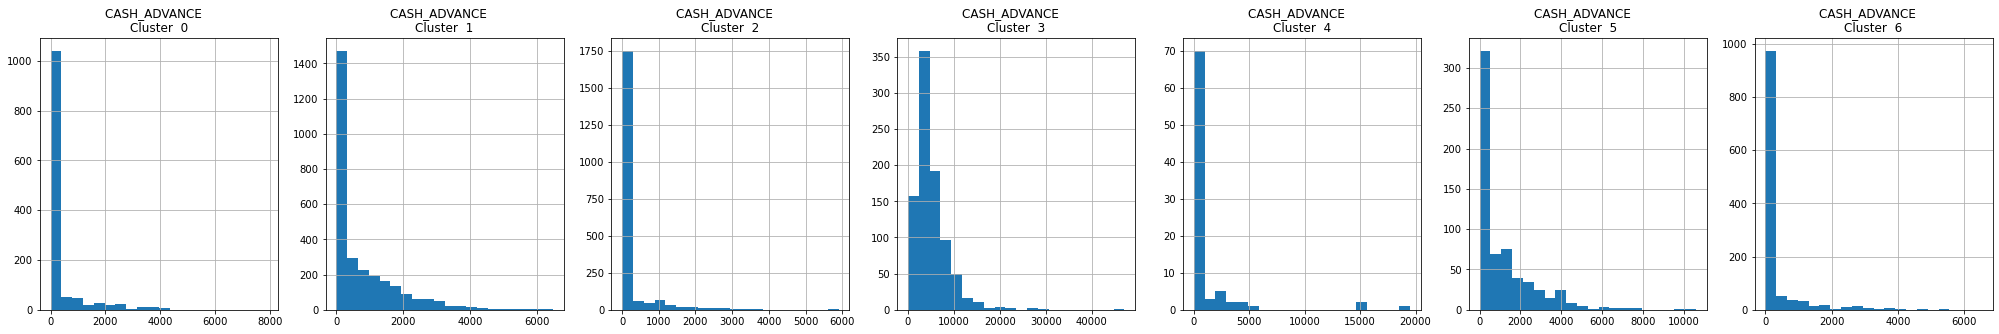

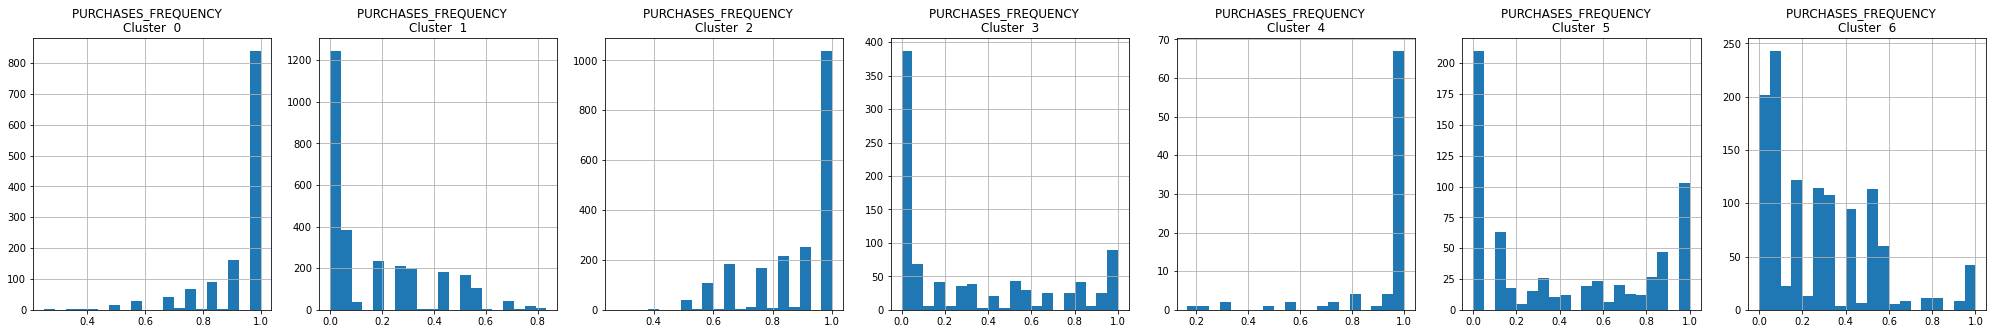

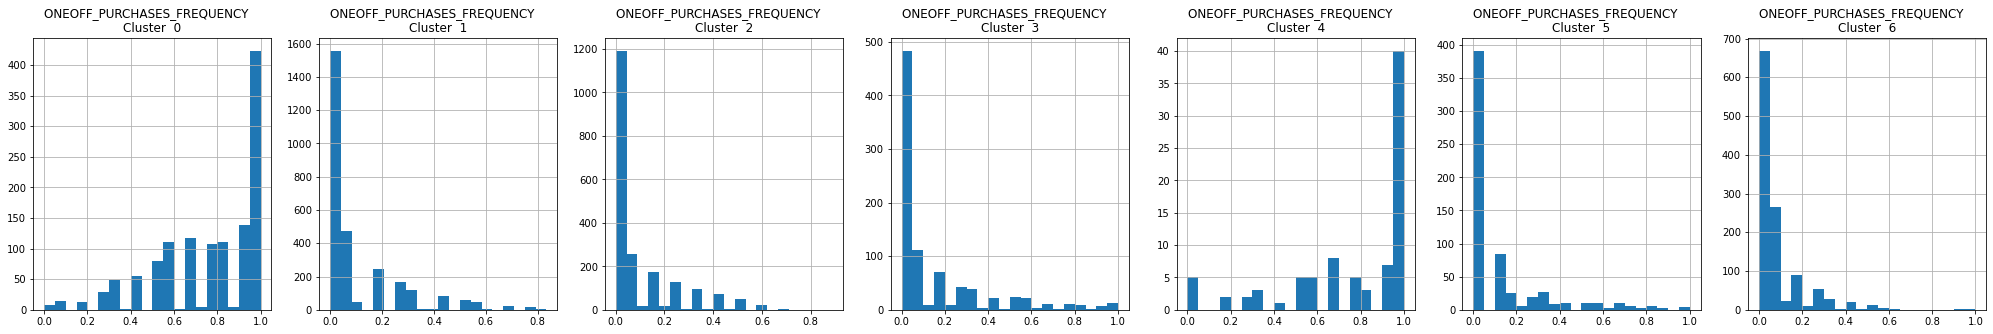

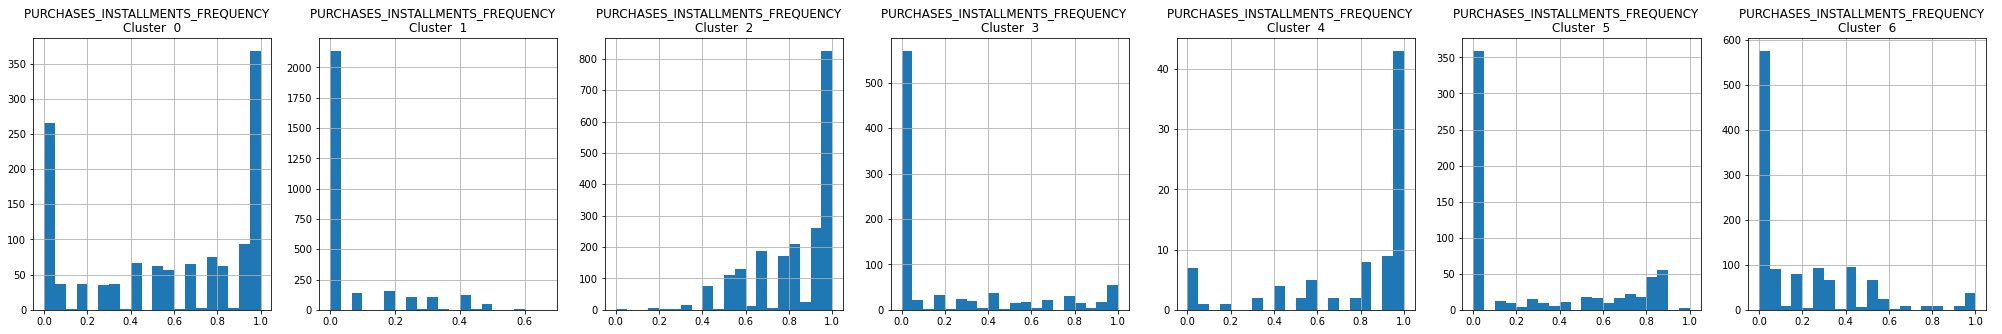

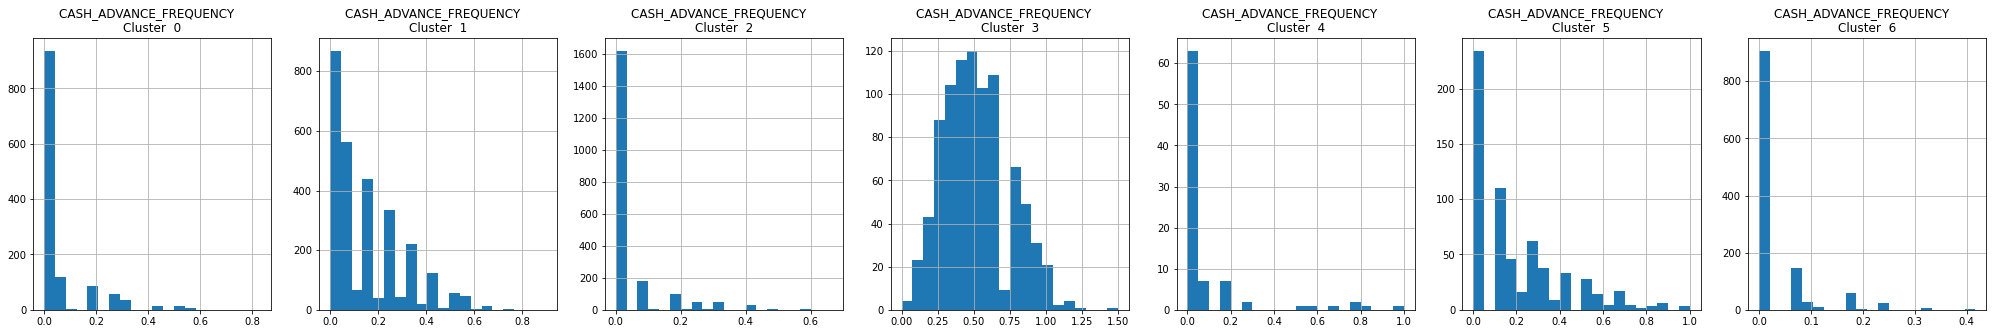

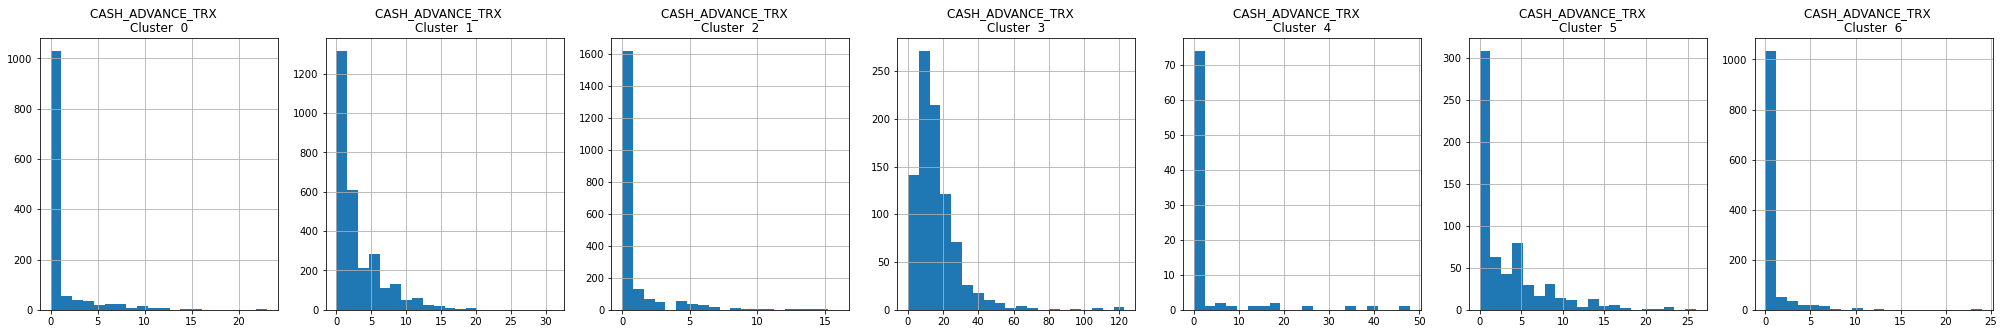

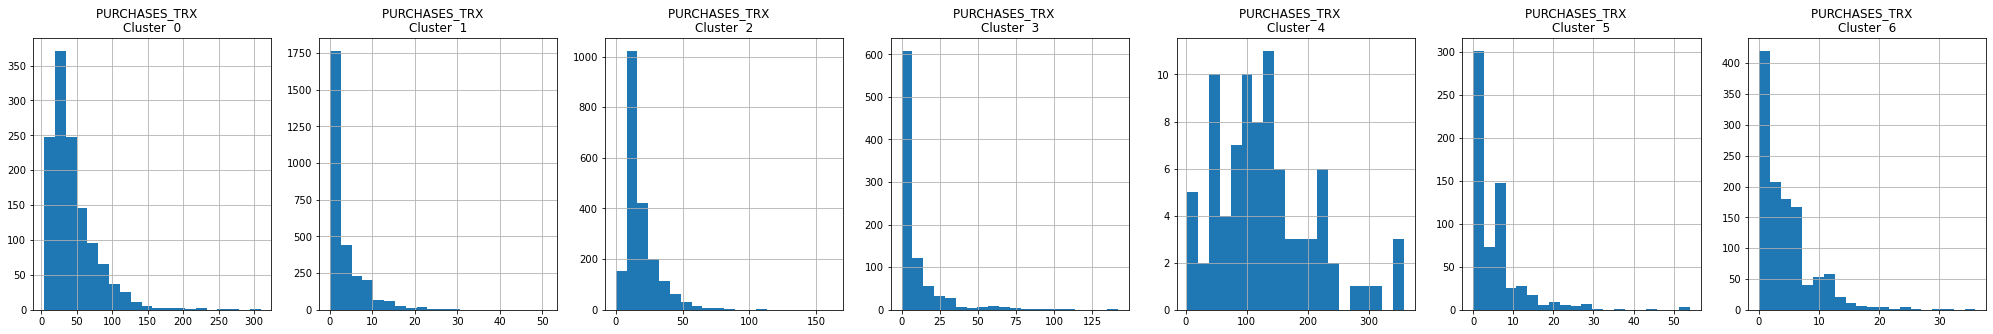

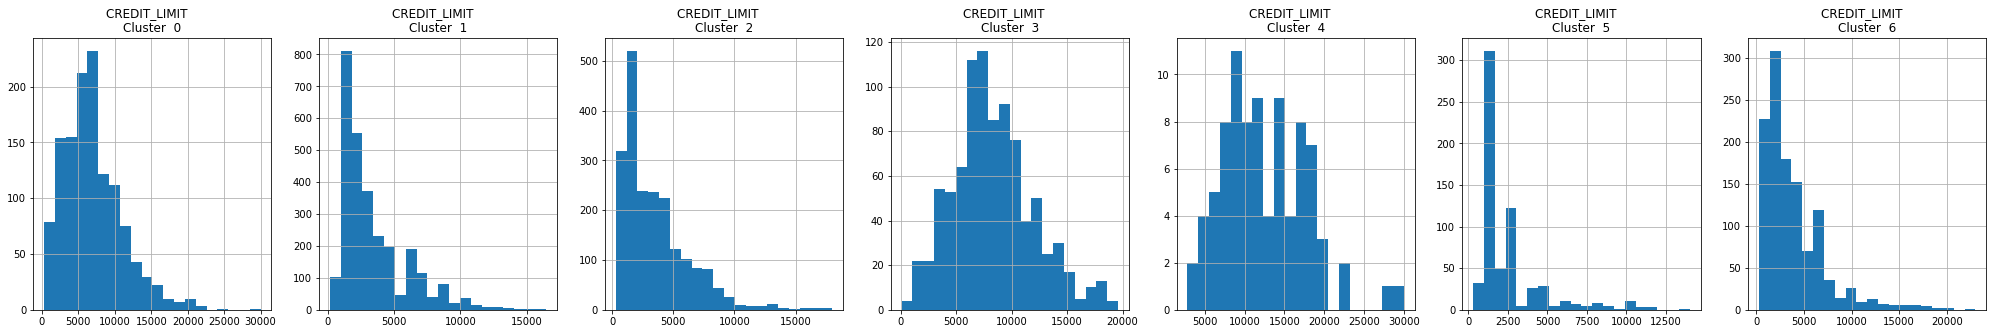

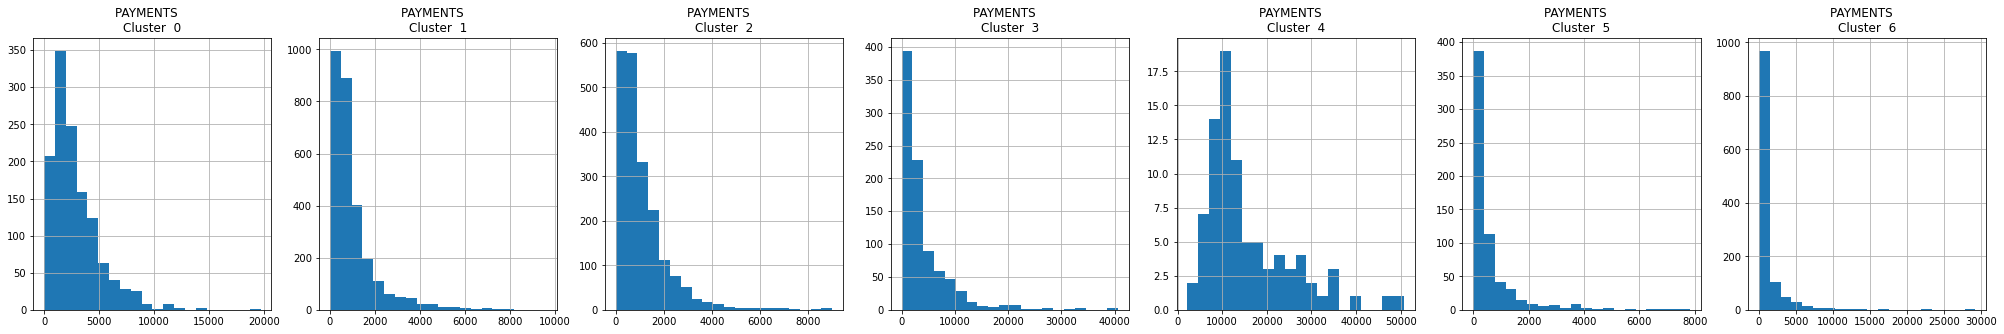

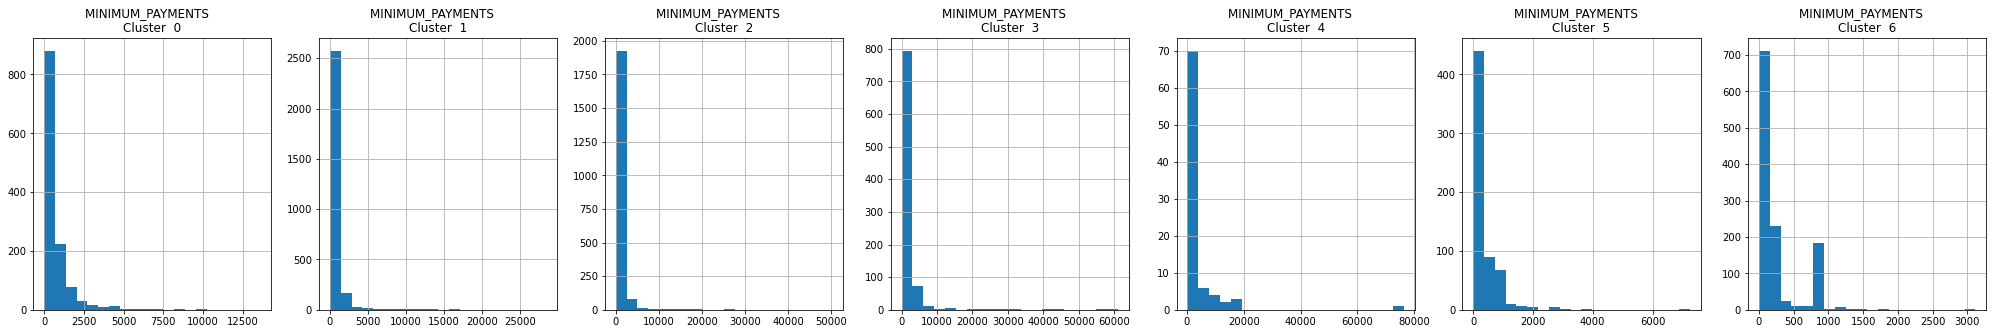

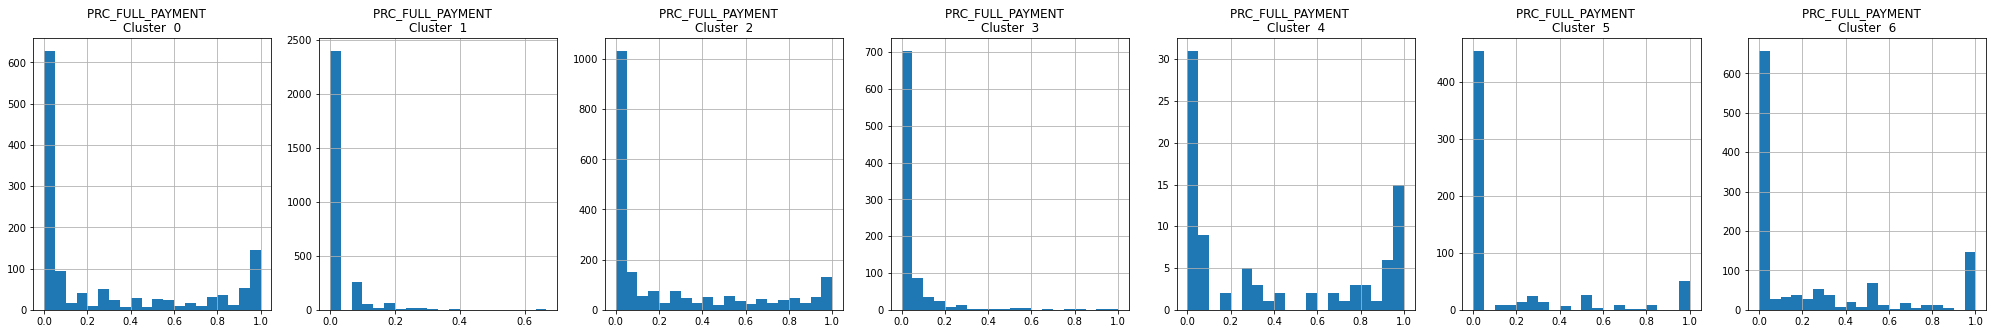

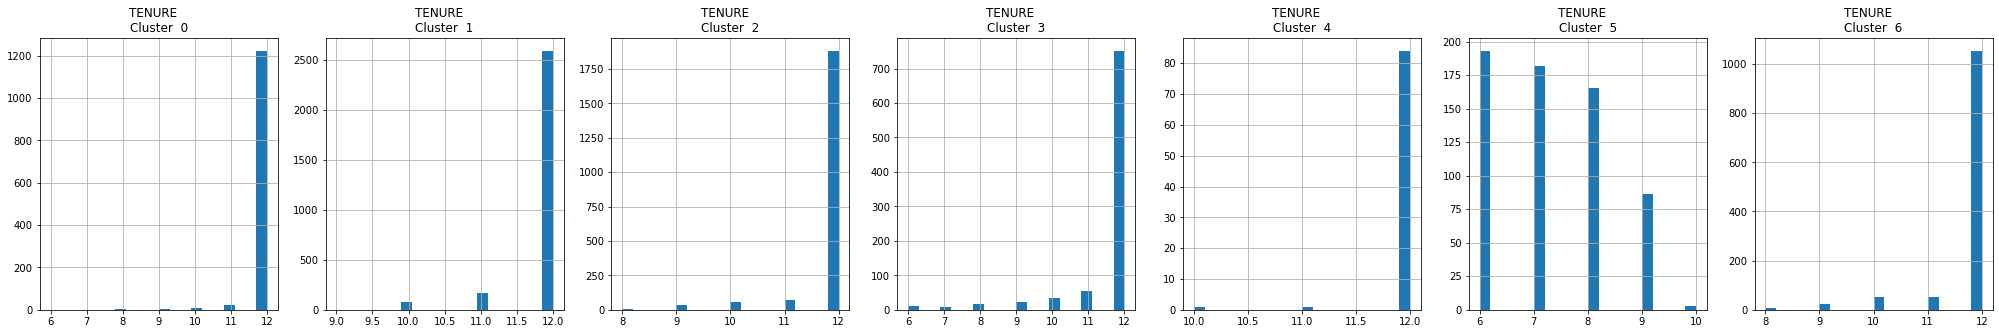

In [35]:
# Plot the histogram of various clusters
for i in customer_df.columns:
    plt.figure(figsize = (35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = customer_df_cluster[customer_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}   \nCluster  {}'.format(i,j))
        
    plt.show()

In [36]:
ex_col=customer_SAM['CUST_ID']
customer_df_cluster.insert(0,'CUST_ID',ex_col)

In [37]:
customer_df_cluster.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,2
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,6


In [38]:
customer_df_cluster.to_csv('clusteroutput.csv', index=False)

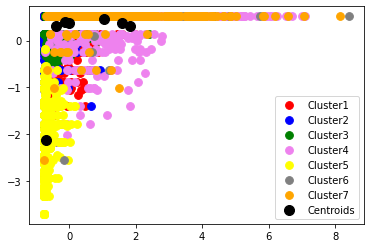

In [39]:
plt.scatter(customer_df_scaled[y_kmeans == 0, 0], customer_df_scaled[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(customer_df_scaled[y_kmeans == 1, 0], customer_df_scaled[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(customer_df_scaled[y_kmeans == 2, 0], customer_df_scaled[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(customer_df_scaled[y_kmeans == 3, 0], customer_df_scaled[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(customer_df_scaled[y_kmeans == 4, 0], customer_df_scaled[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(customer_df_scaled[y_kmeans == 5, 0], customer_df_scaled[y_kmeans == 5, 1], s = 60, c = 'gray', label = 'Cluster6') 
plt.scatter(customer_df_scaled[y_kmeans == 6, 0], customer_df_scaled[y_kmeans == 6, 1], s = 60, c = 'orange', label = 'Cluster7') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
#plt.xlabel('Annual Income (k$)') 
#plt.ylabel('Spending Score (1-100)')
plt.legend() 

In [40]:
hls=sns.color_palette("hls", 7)

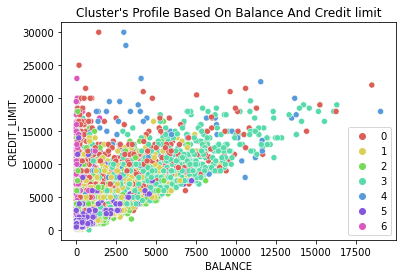

In [44]:
#pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.scatterplot(data = customer_df_cluster,x=customer_df_cluster['BALANCE'], y=customer_df_cluster['CREDIT_LIMIT'],hue=customer_df_cluster['cluster'], palette= hls)
pl.set_title("Cluster's Profile Based On Balance And Credit limit")
plt.legend()
plt.show()

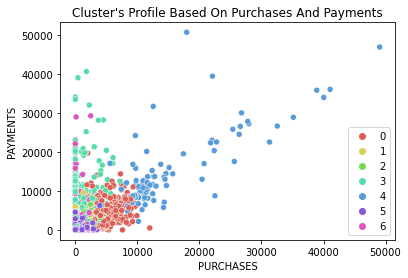

In [45]:

pl = sns.scatterplot(data = customer_df_cluster,x=customer_df_cluster['PURCHASES'], y=customer_df_cluster['PAYMENTS'],hue=customer_df_cluster['cluster'], palette= hls)
pl.set_title("Cluster's Profile Based On Purchases And Payments")
plt.legend()
plt.show()